In [1]:
include("../src/Conduction.jl");
using Plots, LaTeXStrings, QuadGK;

semiconductor = Conduction.Semiconductor(
4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
0.1 * 1.6e-19, # Mode effect of the phonons (J)
3e21, # intrinsic semiconductor's density (cm^-3)
0, # Doping states' density (cm^-3)
0.1 * 1.6e-19, # Energy to a vacant target site (J)
-5.3e4, # Field (V.cm^-1)
1e13, # Base electron jump rate
-27, # Fermi level (J)
2.74, # Intrinsic semiconductor's gaussian width (J)
2.7, # Doping states' gaussian width (J)
2.7, # Amount of disorder
1 / (4.64e-6)
);

T = 300;

In [2]:
range = -15:0.3:15;
function mob(u)
    R = Conduction.RnnVRH(semiconductor, u, T)
    xf = Conduction.xf(semiconductor, R, u, T)
    return Conduction.electronMobility(semiconductor, R, xf)
end

res = mob.(range)

101-element Array{Float64,1}:
 2.752992023468894e-10
 3.716149759075886e-10
 5.01615940428559e-10
 6.771241277535967e-10
 9.14033907186101e-10
 1.233721198613595e-9
 1.6654892399573098e-9
 2.2481082697563626e-9
 3.035640201448378e-9
 4.097175029662758e-9
 5.5295001933328226e-9
 7.465184245398418e-9
 1.0077110844180916e-8
 ⋮
 5.492458529145296e-6
 3.921675546342533e-6
 2.7676020712120716e-6
 1.9301603605211827e-6
 1.3304891475156632e-6
 9.064562960475778e-7
 6.103464536047935e-7
 4.0617385168796205e-7
 2.6713111940474407e-7
 1.73636506934274e-7
 1.1159115111624639e-7
 7.08136872581668e-8

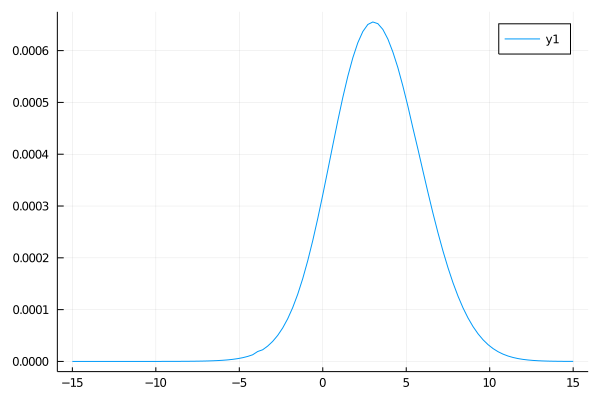

In [3]:
plot(range, res)

In [2]:
res = []

for i in [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, ]
    semiconductor = Conduction.Semiconductor(
    4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
    0.1 * 1.6e-19, # Mode effect of the phonons (J)
    3e21, # intrinsic semiconductor's density (cm^-3)
    0, # Doping states' density (cm^-3)
    0.1 * 1.6e-19, # Energy to a vacant target site (J)
    -i, # Field (V.cm^-1)
    1e13, # Base electron jump rate
    -27, # Fermi level (J)
    2.74, # Intrinsic semiconductor's gaussian width (J)
    2.7, # Doping states' gaussian width (J)
    2.7, # Amount of disorder
    1 / (4.64e-6)
    );
    append!(res, Conduction.overallMobility(semiconductor, Conduction.RnnVRH, T, 15))
end

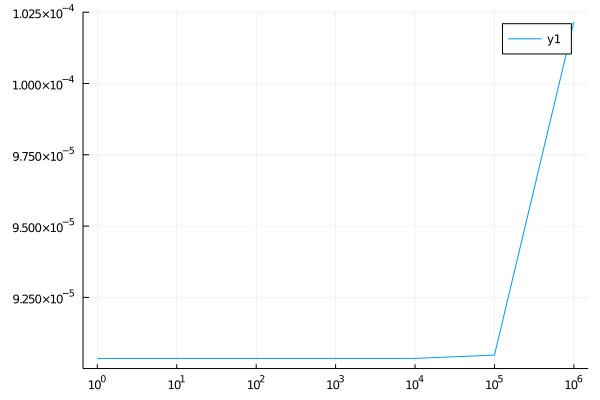

In [4]:
plot([1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6], res, xaxis=:log)

In [ ]:
Conduction.xf(semiconductor, )